This chapter will consist of solutions suggested by students of the STAT303-1 Fall 2022 & Fall 2023 class, which are more efficient than those presented in the original version of the book.

## Missing value imputation based on correlated variables in the data


The code below refers to **Section [7.1.5.3](https://nustat.github.io/DataScience_Intro_python/Data%20cleaning%20and%20preparation.html#method-3-imputing-missing-values-based-on-correlated-variables-in-the-data)** of the book. Students have proposed some ways to avoid a `for` loop in the code, which will lead to parallel computations, thereby saving execution time.

In [2]:
#| echo: false

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import time as tm
gdp_missing_values_data = pd.read_csv('./Datasets/GDP_missing_data.csv')
gdp_complete_data = pd.read_csv('./Datasets/GDP_complete_data.csv')
null_ind_gdpPC = gdp_missing_values_data.index[gdp_missing_values_data.gdpPerCapita.isnull()]
avg_gdpPerCapita = gdp_missing_values_data.groupby(gdp_missing_values_data['continent']).mean(numeric_only=True)['gdpPerCapita']
#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    y = gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE=",rmse)

### Original code

RMSE= 25473.20645170116
Time taken to execute code:  0.061 seconds


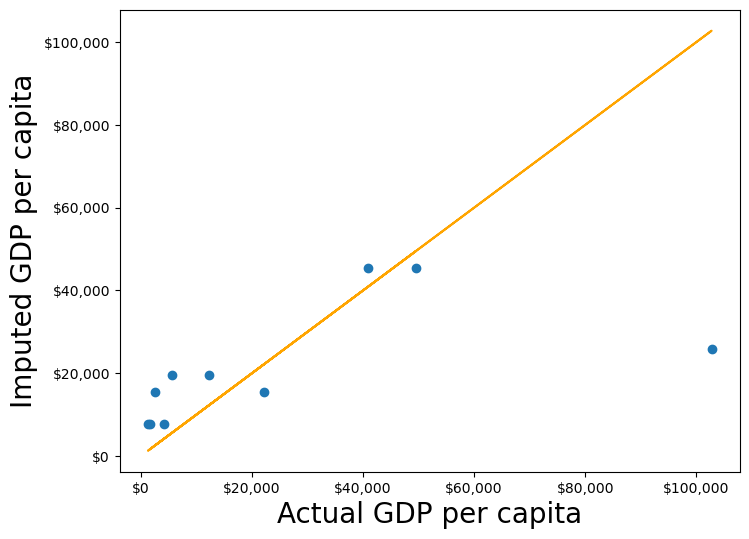

In [3]:
start_time = tm.time()
gdp_imputed_data = gdp_missing_values_data.copy()
for cont in avg_gdpPerCapita.index:
    gdp_imputed_data.loc[(gdp_imputed_data.continent==cont) & (gdp_imputed_data.gdpPerCapita.isnull()),
                     'gdpPerCapita']=avg_gdpPerCapita[cont]
plot_actual_vs_predicted()
print("Time taken to execute code: ",np.round(tm.time()-start_time,3), "seconds")

Below are some more efficient ways to impute the missing values, as they avoid using the `for` loop.

### Alternative code 1:
*By Ryan Yi*

RMSE= 25473.20645170116
Time taken to execute code:  0.023 seconds


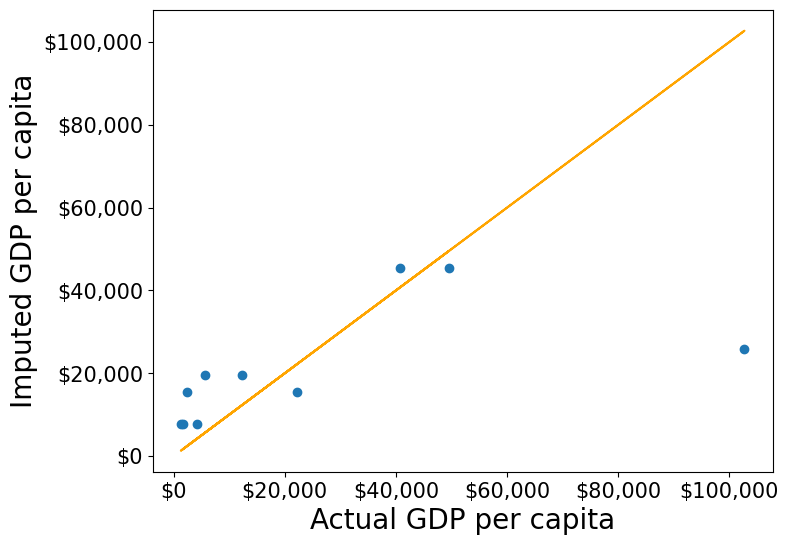

In [4]:
start_time = tm.time()
gdp_imputed_data = gdp_missing_values_data.copy()
gdp_imputed_data.gdpPerCapita = \
gdp_imputed_data['gdpPerCapita'].fillna(gdp_imputed_data['continent'].map(avg_gdpPerCapita))
plot_actual_vs_predicted()
print("Time taken to execute code: ",np.round(tm.time()-start_time,3), "seconds")

### Alternative code 2:
*By Victoria Shi*

RMSE= 25473.20645170116
Time taken to execute code:  0.026 seconds


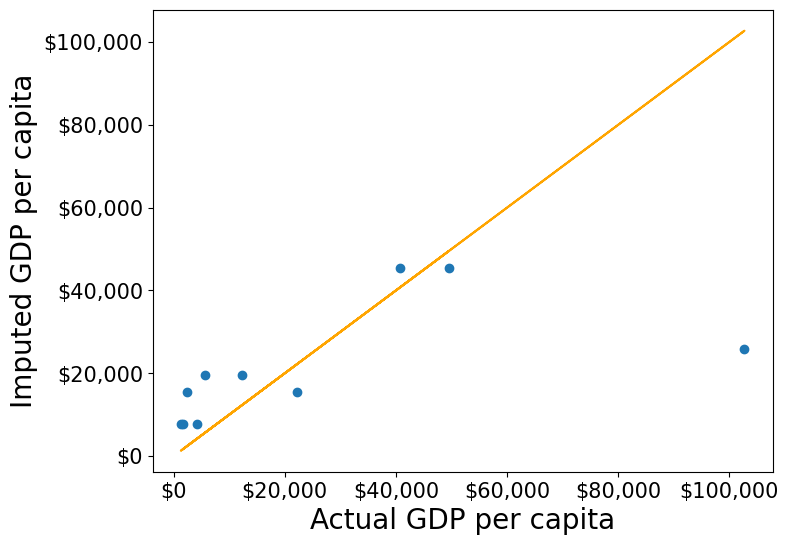

In [5]:
start_time = tm.time()
gdp_imputed_data = gdp_missing_values_data.copy()
gdp_imputed_data["gdpPerCapita"] =  gdp_missing_values_data[['continent','gdpPerCapita']].groupby('continent').transform(lambda x: x.fillna(x.mean()))
plot_actual_vs_predicted()
print("Time taken to execute code: ",np.round(tm.time()-start_time,3), "seconds")

### Alternative code 3:
*By Elijah Nacar*

RMSE= 25473.20645170116
Time taken to execute code:  0.023 seconds


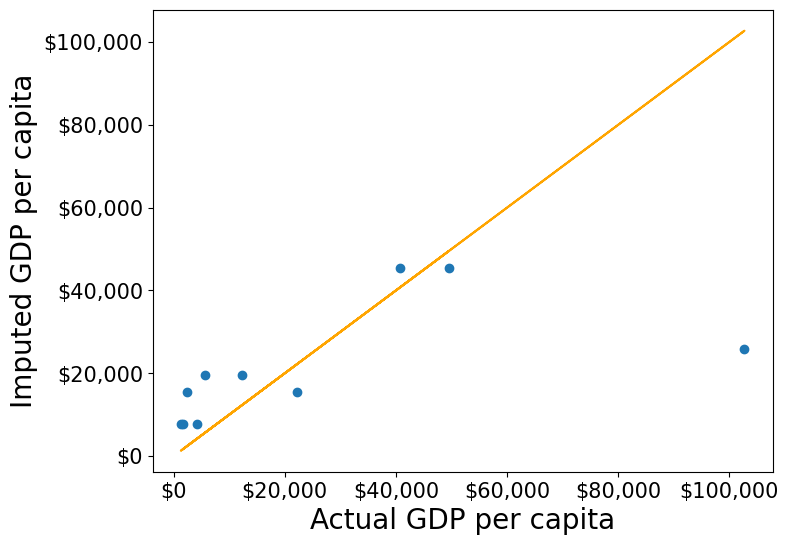

In [6]:
start_time = tm.time()
gdp_imputed_data = gdp_missing_values_data.copy()
gdp_imputed_data.gdpPerCapita = gdp_imputed_data.apply(lambda x: avg_gdpPerCapita[x['continent']] if pd.isnull(x['gdpPerCapita']) else x['gdpPerCapita'],axis=1)
plot_actual_vs_predicted()
print("Time taken to execute code: ",np.round(tm.time()-start_time,3), "seconds")

### Alternative code 4: 
*By Erica Zhou*

RMSE= 25473.20645170116
Time taken to execute code:  0.022 seconds


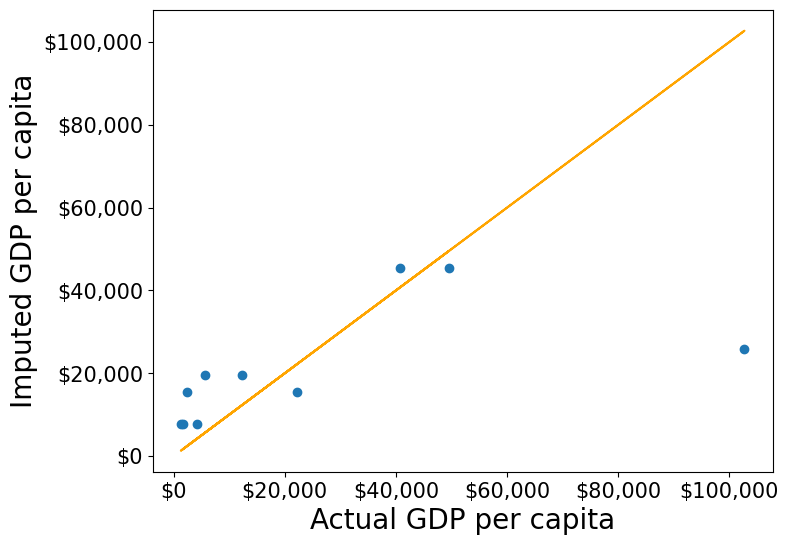

In [7]:
start_time = tm.time()
gdp_imputed_data = gdp_missing_values_data.copy()

cond_list = [gdp_imputed_data['continent'] == 'Africa',gdp_imputed_data['continent'] == 'Asia',
             gdp_imputed_data['continent'] == 'Europe',gdp_imputed_data['continent'] == 'North America',
             gdp_imputed_data['continent'] == 'Oceania',gdp_imputed_data['continent'] == 'South America']

choice_list = list(avg_gdpPerCapita)

gdp_imputed_data.gdpPerCapita = np.select(cond_list, choice_list, gdp_imputed_data.gdpPerCapita)
plot_actual_vs_predicted()
print("Time taken to execute code: ",np.round(tm.time()-start_time,3), "seconds")

## Binning with equal sized bins


The code below refers to **Section [7.2.2](https://nustat.github.io/DataScience_Intro_python/Data%20cleaning%20and%20preparation.html#binning-with-equal-sized-bins)** of the book. A student has proposed a way to avoid the `for` loop in the code, which will lead to parallel computations, thereby saving execution time.

### Original code (in the book)

In [10]:
#| echo: false

college = pd.read_csv('./Datasets/College.csv')
Binned_expend = pd.qcut(college['Expend'],3,retbins = True, labels = ['Low expend','Med expend','High expend'])
college['Expend_bin'] = Binned_expend[0]

In [23]:
#Bootstrapping to find 95% confidence intervals of Graduation Rate of US universities based on average expenditure per student
start_time = tm.time()
for expend_bin in college.Expend_bin.unique():
    data_sub = college.loc[college.Expend_bin==expend_bin,:]
    samples = np.random.choice(data_sub['Grad.Rate'], size=(10000,data_sub.shape[0]))
    print("95% Confidence interval of Grad.Rate for "+expend_bin+" univeristies = ["+str(np.round(np.percentile(samples.mean(axis=1),2.5),2))+","+str(np.round(np.percentile(samples.mean(axis=1),97.5),2))+"]")
print("Time taken to execute code: ",np.round(tm.time()-start_time,3), "seconds")

95% Confidence interval of Grad.Rate for Low expend univeristies = [55.31,59.35]
95% Confidence interval of Grad.Rate for High expend univeristies = [71.03,74.9]
95% Confidence interval of Grad.Rate for Med expend univeristies = [64.17,67.95]
Time taken to execute code:  0.151 seconds


### Alternative code: 
*By Victoria Shi*

In [48]:
start_time = tm.time()
def confidence_interval(df):
    samples = np.random.choice(df['Grad.Rate'], size=(10000, df.shape[0]))
    print("95% Confidence interval of Grad.Rate for "+df["Expend_bin"].iloc[0]+" univeristies = ["+str(np.round(np.percentile(samples.mean(axis=1),2.5),2))+","+str(np.round(np.percentile(samples.mean(axis=1),97.5),2))+"]")
college.groupby('Expend_bin').apply(confidence_interval)
print("Time taken to execute code: ",np.round(tm.time()-start_time,3), "seconds")

95% Confidence interval of Grad.Rate for Low expend univeristies = [55.35,59.35]
95% Confidence interval of Grad.Rate for Med expend univeristies = [64.16,67.95]
95% Confidence interval of Grad.Rate for High expend univeristies = [71.05,74.96]
Time taken to execute code:  0.139 seconds
